In [1]:
import csv
import pandas
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
df = spark.read.csv('/yourpath/shortjokes.csv',inferSchema=True, header =True)

In [4]:
display(df)

ID,Joke
1,"""[me narrating a documentary about narrators] """"I can't hear what they're saying cuz I'm talking"""""""
2,"Telling my daughter garlic is good for you. Good immune system and keeps pests away.Ticks, mosquitos, vampires... men."
3,I've been going through a really rough period at work this week It's my own fault for swapping my tampax for sand paper.
4,"If I could have dinner with anyone, dead or alive... ...I would choose alive. -B.J. Novak-"
5,Two guys walk into a bar. The third guy ducks.
6,Why can't Barbie get pregnant? Because Ken comes in a different box. Heyooooooo
7,Why was the musician arrested? He got in treble.
8,Did you hear about the guy who blew his entire lottery winnings on a limousine? He had nothing left to chauffeur it.
9,What do you do if a bird shits on your car? Don't ask her out again.
10,He was a real gentlemen and always opened the fridge door for me


In [5]:
data = df.toPandas()

/databricks/spark/python/pyspark/sql/types.py:1636: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
 return pa.schema(fields)

In [6]:
data.head()

,ID,Joke
0,1,"""[me narrating a documentary about narrators] ..."
1,2,Telling my daughter garlic is good for you. Go...
2,3,I've been going through a really rough period ...
3,4,"If I could have dinner with anyone, dead or al..."
4,5,Two guys walk into a bar. The third guy ducks.


In [7]:
data = dict(zip(data.ID, data.Joke))

In [8]:
[data.values()][:10]

Out[10]: [dict_values(['"[me narrating a documentary about narrators] ""I can\'t hear what they\'re saying cuz I\'m talking"""', 'Telling my daughter garlic is good for you. Good immune system and keeps pests away.Ticks, mosquitos, vampires... men.', "I've been going through a really rough period at work this week It's my own fault for swapping my tampax for sand paper.", 'If I could have dinner with anyone, dead or alive... ...I would choose alive. -B.J. Novak-', 'Two guys walk into a bar. The third guy ducks.', "Why can't Barbie get pregnant? Because Ken comes in a different box. Heyooooooo", 'Why was the musician arrested? He got in treble.', 'Did you hear about the guy who blew his entire lottery winnings on a limousine? He had nothing left to chauffeur it.', "What do you do if a bird shits on your car? Don't ask her out again.", 'He was a real gentlemen and always opened the fridge door for me', '"Telling my daugthers date that ""she has lice and its very contagious the closer you get to her."" *Correct way to parent."', 'What should you do before criticizing Pac-Man? WAKA WAKA WAKA mile in his shoes', "What's the difference between an illegal Mexican and an autonomous robot...? Nothing... they were both made to steal American jobs.", "What do you call a barbarian you can't see? an Invisigoth.", 'How do you spell Canda? C,eh,N,eh,D,eh', 'You ever notice that the most dangerous thing about marijuana is getting caught with it?', 'What did Arnold Schwarzenegger say at the abortion clinic? Hasta last vista, baby.', 'My wife is in a bad mood. I think her boyfriend forgot their anniversary. Way to go, dude. Now we all suffer...', 'My speech today will be like a mini-skirt. Long enough to cover the essentials but short enough to hold your attention!', 'Thanksgiving joke What does Miley Cyrus eat for Thanksgiving? Twerky! Just kidding... Drugs. She eats drugs. -Adam Zopf @adamzopf', "Why do you never see elephants hiding in trees? 'Cause they are freaking good at it", 'How did the blonde die raking leaves? She fell out of the tree.', '"""That guy is such a douche-bag! Is he single? Maybe I can fix him!"" women"', "My son just got a tattoo of a heart, a spade, a club, and a diamond, all without my permission. I guess I'll deal with him later.", 'What do you call a potato in space? Spudnik', "How to get a cop's attention", 'What happens to a necrophiliac after death? Reserection', 'Why did the chicken hold a seance? To get to the other side.', 'Where do baby cows go to eat lunch? At the calf-eteria.', "What's the difference between a painting and Jesus. You only require one nail to put up the painting.", '"Mom: ""Do you want this?"" Me: ""No."" Mom: ""Ok I\'ll give it to your brother."" Me: ""No I want it."""', 'How do you fit 4 gays on one barstool? Flip it over!', 'I am looking forward to 6pm Thanksgiving Day when Walmart opens its doors for its annual sale of trampled human corpses.', '"Yttrium-barium-copper oxide walks into a bar The bartender tells him, ""We don\'t serve superconductors here."" He leaves without resistance."', 'A guy pick up a woman Then he puts her down', 'Every night, I take all of the singles out of my wallet, spread them on the bed, and pretend I was pretty that day.', "Which gospel contains Jesus' parable about the shades of numbers? Math hue.", 'Ibuprofen is my favorite headache medicine that also sounds like a reggae professor.', 'Ted Cruz getting elected.', "Before I destroy a wasp's nest I like to capture a single wasp and tell it my entire diabolical plan.", "What's Al-Qaeda's favorite American football team? The New York jets.", "INTERVIEWER: Why do you want to work here? ME: *crumbs tumbling from my mouth* Oh, I don't. I was just walking by and saw you had donuts.", "Coming on valentines day. Fifty shades of grey. There won't be a dry seat in the cinema.", "Did you hear about the midget psychic who escaped from prison? He's a small medium at large.", 'Someone didnt click the button in /r/thebutton 

In [9]:
jokes = list(data.values())

In [10]:
jokes[2:4]

Out[12]: ["I've been going through a really rough period at work this week It's my own fault for swapping my tampax for sand paper.",
 'If I could have dinner with anyone, dead or alive... ...I would choose alive. -B.J. Novak-']

In [11]:
jokes = [j.lower() for j in jokes]

In [12]:
jokes[:10]

Out[14]: ['"[me narrating a documentary about narrators] ""i can\'t hear what they\'re saying cuz i\'m talking"""',
 'telling my daughter garlic is good for you. good immune system and keeps pests away.ticks, mosquitos, vampires... men.',
 "i've been going through a really rough period at work this week it's my own fault for swapping my tampax for sand paper.",
 'if i could have dinner with anyone, dead or alive... ...i would choose alive. -b.j. novak-',
 'two guys walk into a bar. the third guy ducks.',
 "why can't barbie get pregnant? because ken comes in a different box. heyooooooo",
 'why was the musician arrested? he got in treble.',
 'did you hear about the guy who blew his entire lottery winnings on a limousine? he had nothing left to chauffeur it.',
 "what do you do if a bird shits on your car? don't ask her out again.",
 'he was a real gentlemen and always opened the fridge door for me']

In [13]:
jokes_short = jokes[:10000]
len(jokes_short)

Out[15]: 10000

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(jokes_short)

In [15]:
total_words = len(tokenizer.word_index)+1

In [16]:
#print(tokenizer.word_index)
print(total_words)

14839

In [17]:

input_sequences = []

for joke in jokes_short:
    token_list = tokenizer.texts_to_sequences([joke])[0]
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [18]:
#pad sequences

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

#create predictor and labels
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [19]:
input_sequences.shape

Out[24]: (161398, 44)

In [20]:
max_sequence_len

Out[25]: 44

In [21]:
ys.shape

Out[27]: (161398, 14839)

In [22]:
print(tokenizer.word_index["dog"])
print(tokenizer.word_index["ass"])
print(tokenizer.word_index["the"])
print(tokenizer.word_index["guy"])

130
368
2
88

In [23]:
model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
embedding_1 (Embedding) (None, 43, 50) 741950 
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200) 120800 
_________________________________________________________________
dense_1 (Dense) (None, 14839) 2982639 
=================================================================
Total params: 3,845,389
Trainable params: 3,845,389
Non-trainable params: 0
_________________________________________________________________

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [25]:
history = model.fit(xs, ys, epochs = 70, verbose = 2)
print(model)

Train on 161398 samples
Epoch 1/70
161398/161398 - 239s - loss: 6.5836 - accuracy: 0.0906
Epoch 2/70
161398/161398 - 239s - loss: 5.9222 - accuracy: 0.1364
Epoch 3/70
161398/161398 - 238s - loss: 5.5251 - accuracy: 0.1578
Epoch 4/70
161398/161398 - 237s - loss: 5.2067 - accuracy: 0.1741
Epoch 5/70
161398/161398 - 238s - loss: 4.9237 - accuracy: 0.1898
Epoch 6/70
161398/161398 - 238s - loss: 4.6652 - accuracy: 0.2058
Epoch 7/70
161398/161398 - 238s - loss: 4.4254 - accuracy: 0.2248
Epoch 8/70
161398/161398 - 237s - loss: 4.2060 - accuracy: 0.2452
Epoch 9/70
161398/161398 - 235s - loss: 4.0029 - accuracy: 0.2668
Epoch 10/70
161398/161398 - 236s - loss: 3.8202 - accuracy: 0.2881
Epoch 11/70
161398/161398 - 236s - loss: 3.6529 - accuracy: 0.3098
Epoch 12/70
161398/161398 - 236s - loss: 3.4992 - accuracy: 0.3305
Epoch 13/70
161398/161398 - 237s - loss: 3.3580 - accuracy: 0.3512
Epoch 14/70
161398/161398 - 236s - loss: 3.2291 - accuracy: 0.3709
Epoch 15/70
161398/161398 - 236s - loss: 3.1139 - accuracy: 0.3882
Epoch 16/70
161398/161398 - 236s - loss: 3.0059 - accuracy: 0.4061
Epoch 17/70
161398/161398 - 236s - loss: 2.9103 - accuracy: 0.4216
Epoch 18/70
161398/161398 - 236s - loss: 2.8209 - accuracy: 0.4358
Epoch 19/70
161398/161398 - 236s - loss: 2.7402 - accuracy: 0.4499
Epoch 20/70
161398/161398 - 235s - loss: 2.6645 - accuracy: 0.4622
Epoch 21/70
161398/161398 - 236s - loss: 2.5968 - accuracy: 0.4739
Epoch 22/70
161398/161398 - 236s - loss: 2.5338 - accuracy: 0.4850
Epoch 23/70
161398/161398 - 236s - loss: 2.4748 - accuracy: 0.4959
Epoch 24/70
161398/161398 - 236s - loss: 2.4204 - accuracy: 0.5050
Epoch 25/70
161398/161398 - 235s - loss: 2.3731 - accuracy: 0.5136
Epoch 26/70
161398/161398 - 236s - loss: 2.3245 - accuracy: 0.5216
Epoch 27/70
161398/161398 - 236s - loss: 2.2806 - accuracy: 0.5290
Epoch 28/70
161398/161398 - 236s - loss: 2.2391 - accuracy: 0.5377
Epoch 29/70
161398/161398 - 236s - loss: 2.2008 - accuracy: 0.5444
Epoch 30/70
161398/161398 - 236s - loss: 2.1662 - accuracy: 0.5494
Epoch 31/70
161398/161398 - 236s - loss: 2.1343 - accuracy: 0.5559
Epoch 32/70
161398/161398 - 236s - loss: 2.0992 - accuracy: 0.5622
Epoch 33/70
161398/161398 - 236s - loss: 2.0708 - accuracy: 0.5667
Epoch 34/70
161398/161398 - 236s - loss: 2.0410 - accuracy: 0.5729
Epoch 35/70
161398/161398 - 235s - loss: 2.0141 - accuracy: 0.5765
Epoch 36/70
161398/161398 - 236s - loss: 1.9882 - accuracy: 0.5819
Epoch 37/70
161398/161398 - 236s - loss: 1.9625 - accuracy: 0.5858
Epoch 38/70
161398/161398 - 236s - loss: 1.9414 - accuracy: 0.5898
Epoch 39/70
161398/161398 - 236s - loss: 1.9187 - accuracy: 0.5943
Epoch 40/70
161398/161398 - 236s - loss: 1.8974 - accuracy: 0.5992
Epoch 41/70
161398/161398 - 236s - loss: 1.8797 - accuracy: 0.6007
Epoch 42/70
161398/161398 - 236s - loss: 1.8596 - accuracy: 0.6051
Epoch 43/70
161398/161398 - 236s - loss: 1.8398 - accuracy: 0.6088
Epoch 44/70
161398/161398 - 236s - loss: 1.8248 - accuracy: 0.6112
Epoch 45/70
161398/161398 - 236s - loss: 1.8065 - accuracy: 0.6138
Epoch 46/70
161398/161398 - 236s - loss: 1.7921 - accuracy: 0.6164
Epoch 47/70
161398/161398 - 236s - loss: 1.7780 - accuracy: 0.6175
Epoch 48/70
161398/161398 - 237s - loss: 1.7616 - accuracy: 0.6219
Epoch 49/70
161398/161398 - 237s - loss: 1.7477 - accuracy: 0.6246
Epoch 50/70
161398/161398 - 237s - loss: 1.7353 - accuracy: 0.6271
Epoch 51/70
161398/161398 - 237s - loss: 1.7253 - accuracy: 0.6280
Epoch 52/70
161398/161398 - 236s - loss: 1.7056 - accuracy: 0.6325
Epoch 53/70
161398/161398 - 236s - loss: 1.7021 - accuracy: 0.6310
Epoch 54/70
161398/161398 - 236s - loss: 1.6851 - accuracy: 0.6369
Epoch 55/70
161398/161398 - 236s - loss: 1.6735 - accuracy: 0.6382
Epoch 56/70
161398/161398 - 236s - loss: 1.6617 - accuracy: 0.6396
Epoch 57/70
161398/161398 - 236s - loss: 1.6494 - accuracy: 0.6415
Epoch 58/70
161398/161398 - 236s - loss: 1.6428 - accuracy: 0.6431
Epoch 59/70
161398/161398 - 236s - loss: 1.6294 - accuracy: 0.6460
Epoch 60/70
161398/161398 - 237s

In [26]:
seed_text = "a guy walks into a bar"
next_words = 40
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

a guy walks into a bar and says what is this joke for the other guy who he says i'm kinda worried about that one of the girls girls want to screw in the radio and i forgot to look on my house 6jzfr4pwibs plato the

In [27]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

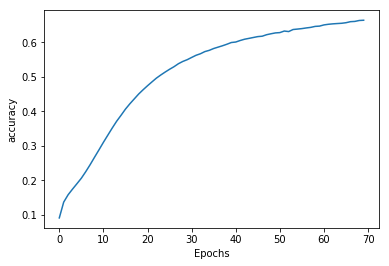

In [28]:
plot_graphs(history, 'accuracy')